# Foundations of Statistical Analysis and Machine Learning - Final exam exercise 1

### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have the maximum grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The subject is long but don't worry if you cannot complete 100 % of the questions, try to do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied from previous another notebook will be penalized. Moreover, similarities between student works are easy to spot.

Good luck!

## Exercise 1 (8 points)

Here are some libraries that could be usefull in the exercises.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

We will work here on the Boston housing data set that records the median value of houses for 506 neighborhoods around Boston. Our task is to predict the median house value.

Let's import that data set from Scikit-learn:  
**Don't worry about the warning for now, see the bonus question a the end.**

In [108]:
from sklearn.datasets import load_boston
data_bunch = load_boston()

E:\Application\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [109]:
data_bunch.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In this data bunch, we have data for the features and feature_names for their names, and target for the response. All the data are already cleaned.

Let's check the description of this data set:

In [110]:
print(data_bunch.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Here are the names of the available features (their discription is given above):

In [111]:
data_bunch.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Let's prepare the data frame of the target (corresponding to the median value of the houses in a specific neighborhood of Boston):

In [112]:
y = pd.DataFrame(data=data_bunch.target, columns=['HOUSEVALUE'])

In [113]:
y.head()

HOUSEVALUE
0        24.0
1        21.6
2        34.7
3        33.4
4        36.2

Let's prepare the data frame of the features:

In [114]:
X = pd.DataFrame(data=data_bunch.data, columns=data_bunch.feature_names)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [115]:
#First Step Let's merge subdata into one data
dataset = pd.merge(X,y,left_index=True,right_index=True)
dataset.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  HOUSEVALUE  
0     15.3  396.90   4.98        24.0  
1     17.8  396.90   9.14        21.6  
2     17.8  392.83   4.03        34.7  
3     18.7  394.63   2.94        33.4  
4     18.7  396.90   5.33        36.2

### 1) We will focus here on LSTAT. Compute the correlation of LSTAT with the other features. Which other feature is the most correlated with LSTAT? Which is the least?

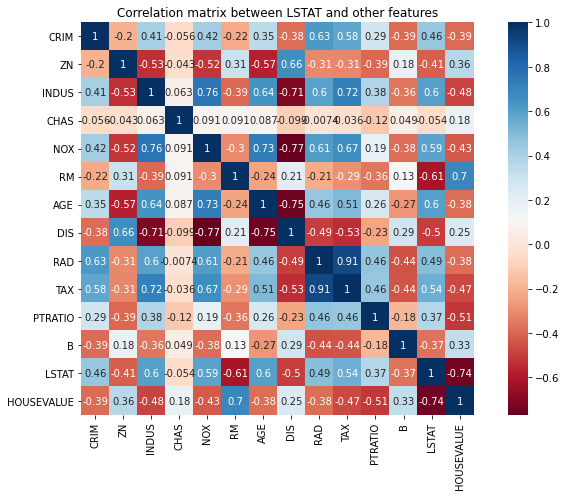

In [116]:
corr=dataset.corr()
plt.subplots(figsize=(10,7));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix between LSTAT and other features")
plt.tight_layout()
plt.show()

We can see that these features such as CRIM', 'INDUS', 'NOX','AGE', 'RAD','TAX' are highly correlated with LSTAT. The rest things are the least.

### 2a) Plot HOUSEVALUE (our target) vs. LSTAT (our predictor)

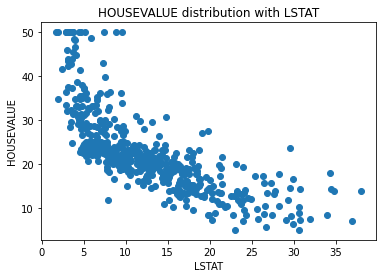

In [117]:
plt.scatter(dataset['LSTAT'], dataset['HOUSEVALUE']) # x,y
plt.xlabel('LSTAT')
plt.ylabel('HOUSEVALUE')
plt.title("HOUSEVALUE distribution with LSTAT")
plt.show()

### 2b) Do you think that a linear regression is relevant for predicting HOUSEVALUE from LSTAT? Explain why.

Yes, I think that think that a linear regression is relevant for predicting HOUSEVALUE from LSTAT because The scatter plot looks linear so probably the regression model will fit well.

### 3) Proceed to a split of the dataset. Bear in mind that you will have to give an accurate estimation of the performance of your best model at the end. Keep 60% of the examples for the training set. 

In [118]:
X = dataset['LSTAT'].values.reshape(-1,1)
y = dataset['HOUSEVALUE'].values.reshape(-1,1)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

### 4a) Train a linear regression model with LSTAT as predictor. 

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 4b) Compute the performance metrics of the model (at least R-squared and another metric of your choice).   How do you interpret that? Does the model have a reasonable error in this context?

In [121]:
y_pred = regressor.predict(X_test)

In [122]:
from sklearn.metrics import r2_score

def evaluate_regression(y_test, y_pred):
    print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
    print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))
    print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
    print("Coefficient of determination (R^2): %.2f" % r2_score(y_test,y_pred))

evaluate_regression(y_test, y_pred)

Mean square error (MSE): 39.74
Root mean square error (RMSE): 6.30
Mean absolute error (MAE): 4.58
Coefficient of determination (R^2): 0.52


R² = 0.52 --> With r-squared of 52 % reveals that 52% of the data fit the regression model.So, in this case, it seems that with single predictor (LSTAT) we haven't get the high accuracy for our model. The accuracy will be improved if we add more predictors.

### 4c) What is the coefficient associated with LSTAT? What is the value of the other parameter of your model? Can you interpret your model's parameters and explain how it generates predictions for HOUSEVALUE?

In [123]:
print('Coefficient: ', regressor.coef_[0][0])
print('Intercept: ', regressor.intercept_[0])

Coefficient:  -0.9710240546495684
Intercept:  34.88337392662986


Here, the coefficient associated with LSTAT is -0.97 and the value of the other parameter of your model is Intercept (34.8).
Based on the equation: linear regression formula: (Y = A + B.X) We have A=regressor.intercept_ and B=regressor.coef_ .If LSTAT (X) is increased by n. So Y(HOUSEVALUE) will be increased by B(34.8)*n.

### 4d) Add the regression line on your plot HOUSEVALUE vs. LSTAT

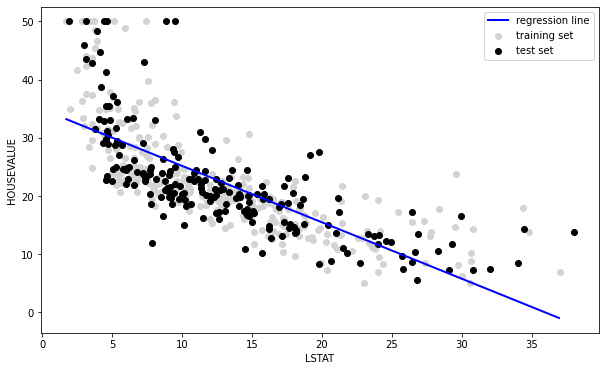

In [124]:
# plot regression line ( predict line)
X_plot = np.arange(min(X_train), max(X_train), 0.1)
y_plot = regressor.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("LSTAT")
plt.ylabel("HOUSEVALUE")
plt.legend()
plt.show()


### 5a) Use any feature engineering technique you know in order to train a better linear regression model that uses LSTAT (only) to predict HOUSEVALUE  
Hint: Look at the regression line you plotted in the last question and see what you could improve.

In [97]:
X_2 = dataset['LSTAT'].values.reshape(-1,1)
y_2 = dataset['HOUSEVALUE'].values.reshape(-1,1)

In [98]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.40, random_state = 0)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)


In [100]:
from sklearn.linear_model import LinearRegression
regressor_2 = LinearRegression()
regressor_2.fit(X_train_2, y_train_2)

LinearRegression()

In [101]:
y_pred_2 = regressor_2.predict(X_test_2)

In [102]:
evaluate_regression(y_test_2, y_pred_2)

Mean square error (MSE): 39.74
Root mean square error (RMSE): 6.30
Mean absolute error (MAE): 4.58
Coefficient of determination (R^2): 0.52


### 5b) Show the regression line of your new model on the plot HOUSEVALUE vs. LSAT

### 5c) Compute the same two performance metrics as in question 4b on your improved model. Is it doing better?

### 6a) Train a last regression model that uses ALL available features as predictors

In [103]:
X_3 = dataset.drop('HOUSEVALUE',axis = 1)
y_3 = dataset['HOUSEVALUE'].values.reshape(-1,1)


In [104]:
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.40, random_state = 0)

In [105]:
# Model fit
regressor_3 = LinearRegression()
regressor_3.fit(X_train_3, y_train_3)
# Model accuracy
y_pred_3 = regressor_3.predict(X_test_3)


### 6b) What are the performance metrics when you take all the features as predictors?

In [106]:
evaluate_regression(y_test_3, y_pred_3)

Mean square error (MSE): 25.79
Root mean square error (RMSE): 5.08
Mean absolute error (MAE): 3.63
Coefficient of determination (R^2): 0.69


### 7) Choose the best model among the three you trained previously and give a reliable assessment (on unseen data) of the following metrics: [R-squared, MAE, RMSE]. Interpret the metrics you obtain

The 𝑅2 score indicates that adding all features allowed the model to explain 69% of the variance, as opposed to 52% with only one predictor.
So the the model of all features as predictors is the best model.

### 8) BONUS: While loading the dataset, you might have seen a warning saying that the dataset is deprecated because of an ethical problem. What do you think is problematic? 

if i get a warning saying that the dataset is deprecated because of an ethical problem. It will not use this dataset. Sometimes, we must know that dataset is sensitive data.It is private information and we should respect it.